In [5]:
%cd /content/drive/MyDrive/ColabWork/TabularWork/

/content/drive/MyDrive/ColabWork/TabularWork


In [6]:
!ls

models	mytabular.ipynb  README.md  test_clean	train_clean


In [1]:
!pip install fastai -q --upgrade

     |████████████████████████████████| 194kB 13.4MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 


In [2]:
from fastai.tabular.all import *

In [7]:
train_df = pd.read_pickle('train_clean')
test_df = pd.read_pickle('test_clean')

In [8]:
train_df.head().T

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
...,...,...,...,...,...
StateHoliday_bw,0,0,0,0,0
Promo_bw,5,5,5,5,5
SchoolHoliday_fw,7,1,5,1,1
StateHoliday_fw,0,0,0,0,0


In [9]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw', 'Promo', 'SchoolHoliday']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday']
   
dep_var = 'Sales'

In [10]:
train_df[dep_var] = np.log(train_df[dep_var])

In [11]:
procs = [FillMissing, Normalize, Categorify]

In [12]:
len(train_df), len(test_df)

(844338, 41088)

In [13]:
idx = train_df['Date'][(train_df['Date'] == train_df['Date'][len(test_df)])].index.max()

In [14]:
idx

41395

In [15]:
splits = (L(range(idx, len(train_df))),L(range(idx)))

In [16]:
pd.options.mode.chained_assignment=None

In [17]:
to = TabularPandas(train_df, procs, cat_vars, cont_vars, dep_var, y_block=RegressionBlock(),
                   splits=splits, inplace=True, reduce_memory=True)

In [18]:
dls = to.dataloaders(bs=512)

In [19]:
dls.show_batch()

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,PromoInterval,CompetitionOpenSinceYear,Promo2SinceYear,State,Week,Events,Promo_fw,Promo_bw,StateHoliday_fw,StateHoliday_bw,SchoolHoliday_fw,SchoolHoliday_bw,Promo,SchoolHoliday,CompetitionDistance_na,CloudCover_na,CompetitionDistance,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Sales
0,848,6,2015,3,21,False,24,25,a,c,"Jan,Apr,Jul,Oct",2007,2011,BW,12,Rain,0,5,0,0,0,0,0,0,False,False,370.000083,13.0,6.000000e+00,-1.000000e+00,87.0,70.000000,30.000000,35.0,8.0,6.0,70.0,63.000000,74.000000,-12.999999,8.560253
1,1036,6,2014,11,29,False,0,25,d,c,"Jan,Apr,Jul,Oct",1900,2013,NW,48,Fog,5,5,0,0,0,0,0,0,False,False,9559.999912,6.0,2.000000e+00,-2.000000e+00,100.0,85.000000,67.999999,21.0,11.0,6.0,88.0,86.000001,28.000000,-26.000000,8.744010
2,461,6,2014,12,20,False,17,25,d,c,"Jan,Apr,Jul,Oct",2013,2013,BW,51,Rain,0,5,2,0,5,0,0,0,False,False,1790.000020,6.0,4.000000e+00,2.000000e+00,93.0,74.000000,52.000000,29.0,16.0,5.0,72.0,79.000000,49.000000,-5.000001,8.943245
3,739,6,2015,6,13,False,24,25,d,c,"Jan,Apr,Jul,Oct",2008,2011,BY,24,Thunderstorm,5,0,0,0,0,0,0,0,False,False,2770.000111,25.0,2.000000e+01,1.500000e+01,94.0,74.000000,54.000000,27.0,6.0,3.0,88.0,82.000000,9.000001,-63.000000,9.175542
4,432,3,2013,8,14,False,3,0,a,a,#na#,2013,1900,HH,33,Fog-Rain,3,3,0,0,0,0,1,0,False,False,810.000162,19.0,1.400000e+01,1.100000e+01,94.0,81.000000,43.000000,26.0,13.0,3.0,62.0,61.000000,86.000000,-50.000000,9.468774
5,193,4,2013,2,7,False,0,0,a,a,#na#,1900,1900,BW,6,Snow,2,4,0,0,0,0,1,0,False,False,519.999983,1.0,2.798677e-07,-2.000000e+00,95.0,87.999999,76.999999,23.0,14.0,6.0,55.0,51.000000,32.000000,-50.000000,8.569596
6,616,4,2014,6,5,False,24,25,a,c,"Mar,Jun,Sept,Dec",2011,2010,NW,23,Rain,2,4,1,0,1,0,1,0,False,False,3039.999885,18.0,1.300000e+01,8.000000e+00,94.0,69.000000,37.000000,35.0,21.0,4.0,63.0,60.000000,7.000001,-4.000002,9.245321
7,210,4,2015,2,26,False,24,25,d,a,"Feb,May,Aug,Nov",1999,2013,RP,9,Rain,3,1,0,0,0,0,0,0,False,False,970.000148,11.0,6.000000e+00,1.085686e-07,88.0,61.000000,36.000000,18.0,8.0,7.0,81.0,71.000000,56.000001,-36.000000,7.852439
8,344,1,2013,7,29,False,24,25,a,c,"Jan,Apr,Jul,Oct",2011,2011,HH,31,Rain-Thunderstorm,5,1,0,0,3,5,1,1,False,False,299.999944,26.0,2.100000e+01,1.600000e+01,100.0,77.000000,39.000000,29.0,6.0,5.0,60.0,60.000000,70.000001,-66.000000,9.532496
9,802,5,2013,10,4,False,0,25,a,c,"Feb,May,Aug,Nov",1900,2011,SH,40,Rain,4,0,0,1,5,1,0,1,False,False,910.000095,12.0,8.000000e+00,5.000000e+00,82.0,63.000000,51.000000,23.0,14.0,5.0,65.0,62.000000,1.000001,-82.000001,8.883502


In [20]:
max_log_y = np.max(train_df['Sales'])*1.2

In [21]:
max_log_y

12.7616122408592

In [22]:
y_range = torch.tensor([0, max_log_y]); y_range

tensor([ 0.0000, 12.7616])

In [27]:
tabular_learner??

In [23]:
config=tabular_config(ps=[0.001, 0.01],embed_p=0.04, y_range=y_range)

In [24]:
learn = tabular_learner(dls, config=config, metrics=exp_rmspe,
                       loss_func=MSELossFlat())

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.0006918309954926372)

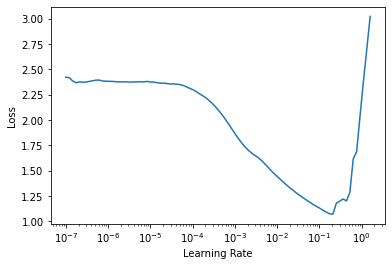

In [25]:
learn.lr_find()

In [26]:
learn.fit_one_cycle(5, 3e-3, wd=0.2)

epoch,train_loss,valid_loss,_exp_rmspe,time
0,0.021977,0.022083,0.156702,00:35
1,0.014347,0.015710,0.127287,00:35
2,0.011663,0.013089,0.117133,00:35
3,0.009475,0.011858,0.114167,00:35
4,0.008301,0.011353,0.109777,00:35


In [27]:
learn.show_results()

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,PromoInterval,CompetitionOpenSinceYear,Promo2SinceYear,State,Week,Events,Promo_fw,Promo_bw,StateHoliday_fw,StateHoliday_bw,SchoolHoliday_fw,SchoolHoliday_bw,Promo,SchoolHoliday,CompetitionDistance_na,CloudCover_na,CompetitionDistance,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Sales,Sales_pred
0,984.0,4.0,3.0,7.0,30.0,1.0,1.0,26.0,3.0,1.0,2.0,1.0,6.0,7.0,31.0,11.0,6.0,5.0,1.0,1.0,6.0,6.0,2.0,2.0,1.0,1.0,-0.642170,0.734633,0.609246,0.544769,-0.709321,-0.111212,-0.743133,0.376843,-0.145218,-0.361048,1.947296,1.893911,0.562375,1.184784,8.957640,8.888788
1,1095.0,2.0,3.0,6.0,23.0,1.0,25.0,26.0,1.0,1.0,2.0,15.0,4.0,12.0,26.0,18.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.610128,0.013043,0.186341,0.387056,0.865326,0.732088,0.377185,1.375552,0.693308,-0.361048,0.497209,2.218175,-0.290631,1.184784,8.374938,8.311990
2,208.0,2.0,3.0,6.0,30.0,1.0,25.0,1.0,3.0,1.0,0.0,14.0,1.0,1.0,27.0,0.0,5.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,-0.660113,1.335959,1.596025,1.806479,-1.496644,-1.797812,-1.456062,-0.177996,-0.312923,-0.977701,0.044057,0.921121,-0.069482,1.184784,8.445482,8.250005
3,434.0,2.0,3.0,6.0,30.0,1.0,25.0,26.0,1.0,1.0,2.0,11.0,7.0,3.0,27.0,0.0,5.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.970168,1.576489,1.314088,1.017910,0.865326,-0.647858,-0.692209,-1.398640,-1.151448,-2.827657,0.406578,0.921121,-0.385410,-0.232115,9.439943,9.324073
4,172.0,1.0,3.0,7.0,20.0,1.0,1.0,26.0,1.0,1.0,2.0,1.0,7.0,3.0,30.0,2.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.684465,1.817019,2.018930,2.121906,0.078002,-0.417867,-0.437592,-0.732834,-0.648333,-0.977701,1.584774,2.326262,0.246447,0.383928,8.829812,8.792684
5,57.0,2.0,3.0,7.0,21.0,1.0,14.0,1.0,4.0,3.0,0.0,22.0,1.0,10.0,30.0,11.0,2.0,4.0,1.0,1.0,6.0,6.0,1.0,2.0,1.0,1.0,-0.644733,2.057549,2.018930,1.964193,0.078002,-0.724521,-1.099597,0.376843,-0.145218,-0.361048,1.675404,2.326262,0.278039,1.184784,8.881836,8.829151
6,741.0,2.0,3.0,7.0,7.0,1.0,1.0,1.0,4.0,3.0,0.0,1.0,1.0,4.0,28.0,7.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.826621,1.817019,1.596025,1.175624,0.078002,-0.724521,-1.252368,-0.177996,-0.648333,0.255604,1.947296,2.218175,0.151668,1.184784,8.880863,8.867409
7,1050.0,6.0,3.0,7.0,25.0,1.0,12.0,26.0,4.0,3.0,3.0,22.0,4.0,5.0,30.0,18.0,6.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,0.989393,0.975163,1.173120,1.333338,0.734105,-0.341203,-0.386668,5.037486,3.208884,-0.977701,2.400448,2.326262,0.404411,1.184784,8.772145,8.773998
8,960.0,4.0,3.0,7.0,30.0,1.0,1.0,26.0,4.0,1.0,1.0,1.0,2.0,5.0,31.0,11.0,6.0,5.0,1.0,1.0,8.0,5.0,2.0,2.0,1.0,1.0,0.453656,1.095429,0.609246,0.229342,-0.053218,-1.414494,-1.659756,0.709746,-0.145218,-0.977701,1.856665,1.893911,0.562375,1.184784,9.100414,8.980833


In [ ]:
!pip install fastinference

In [ ]:
!pip install shap

In [30]:
from fastinference.tabular import *

In [33]:
exp = ShapInterpretation(learn, test_df.iloc[:2])

Displaying row 1 of 2 (use `row_idx` to specify another row)


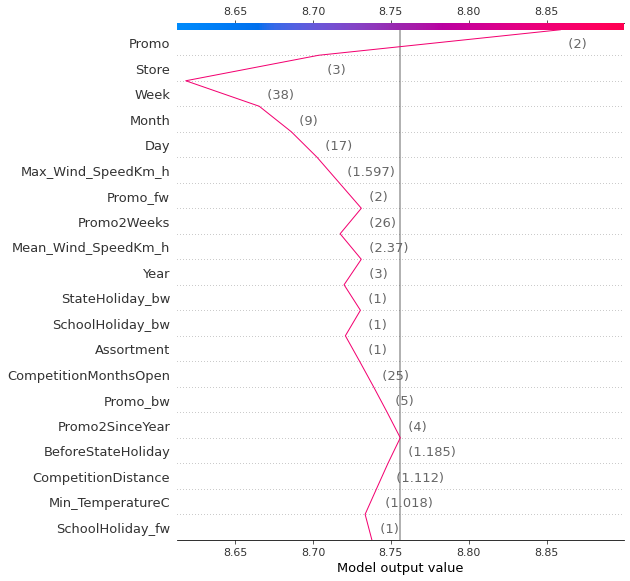

In [37]:
exp.decision_plot(row_idx=1)

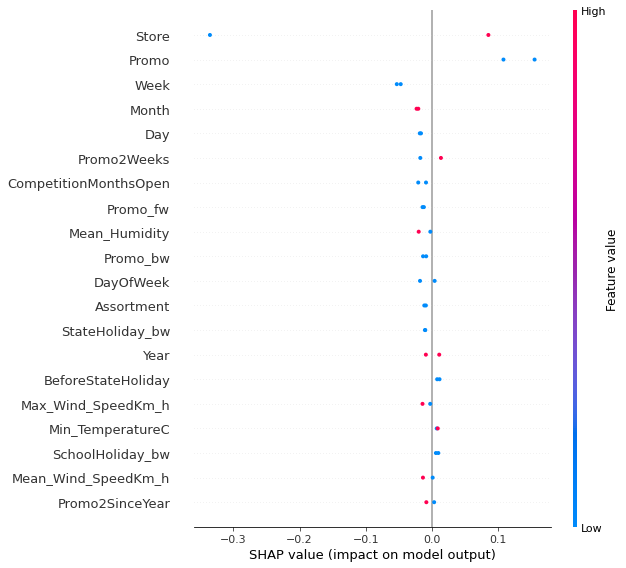

In [36]:
exp.summary_plot()

In [38]:
exp.force_plot()